# **Tarea 2**

## Objetivos
Desarrollar una aplicación en Jupyter Notebook que muestre una historia del proceso de preparación
y visualización de datos para su posterior análisis, utilizando las herramientas que provee el lenguaje
de programación Python a través de las bibliotecas vistas en clases (Numpy, Pandas y Matplotlib).
La aplicación a desarrollar debe considerar los siguientes ítems.

## Tabla de contenidos
1. [Adquisición de datos](#0)
2. [Limpieza y formateo de datos](#2)

## 1. Adquisición de datos  <a id="0"></a>

- Para la siguiente tarea se utilizaran dos conjuntos de datos distintos. A continucacion se da a conocer el tipo de dato al cual corresponde cada conjunto:

- Tipo de datos de School_Attendance_by_Student_Group: csv
- Tipo de datos de School_Attendance_by_Student_Group: csv

Para trabajar con estos datos el primer paso es importar la librerias pandas y numpy.

In [398]:
import pandas as pd
import numpy as np

## Limpieza y formateo de datos <a id="2"></a>


### 1. Utilizar los métodos pandas.read_xxx() y pandas.to_xxx() para leer y guardar los datos.


In [399]:
# Lee el archivo de entrada mediante pandas y lo asigna a la variable "df"

ubicacion = "./datos/imdb_top_2000_movies.csv"
df = pd.read_csv(ubicacion, header=None)

In [400]:
# Muestra las primeras 10 filas usando el método dataframe.head()

print("Las primeras 5 filas del dataframe") 
df.head(20)

Las primeras 5 filas del dataframe


,0,1,2,3,4,5,6,7,8,9
0,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
1,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
2,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
3,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
4,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
5,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
6,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M
7,Once Upon a Time in the West,1968,166,8.5,82.0,"348,110",Western,Sergio Leone,Henry Fonda,$5.32M
8,The Dirty Dozen,1967,150,7.7,73.0,"78,858","Action, Adventure, War",Robert Aldrich,Lee Marvin,$45.30M
9,Rosemary's Baby,1968,137,8.0,96.0,"234,034","Drama, Horror",Roman Polanski,Mia Farrow,NaN


### 2. Revisar si los datos de entrada tienen o no un encabezado. De no ser así, corregir esta situación.





In [401]:
# Crea una lista con el encabezado

encabezado = ["Movie Name","Release Year","Duration","IMDB Rating", "Metascore","Votes","Genre","Director","Cast","Gross($M)"]
print("headers\n", encabezado)

headers
 ['Movie Name', 'Release Year', 'Duration', 'IMDB Rating', 'Metascore', 'Votes', 'Genre', 'Director', 'Cast', 'Gross($M)']


In [402]:
# Se reemplaza el encabezado y se verifica que todo funcionó correctamente

df.columns = encabezado
df.head()

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
0,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
1,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
2,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
3,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
4,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M


### Se procede a la eliminación de la columna 0
Esto se realiza para una mejor visualización de los datos con los que se trabajaran

In [403]:
# Se elimina la columna 0 la cual tenía los nombres de las filas

df = df.drop(0) 

### 3. Realizar un análisis básico de los datos de entrada con los métodos .describe() y .info().

In [404]:
df.describe(include = "all")

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
count,2000,2000,2000,2000,1919,2000,2000,2000,2000,1903
unique,1981,112,131,66,89,1991,264,918,919,1721
top,The Omen,2007,104,7.2,73.0,"101,547","Comedy, Drama, Romance",Steven Spielberg,Tom Cruise,$0.02M
freq,2,123,53,103,51,2,98,22,23,7


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 1 to 2000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Name    2000 non-null   object
 1   Release Year  2000 non-null   object
 2   Duration      2000 non-null   object
 3   IMDB Rating   2000 non-null   object
 4   Metascore     1919 non-null   object
 5   Votes         2000 non-null   object
 6   Genre         2000 non-null   object
 7   Director      2000 non-null   object
 8   Cast          2000 non-null   object
 9   Gross($M)     1903 non-null   object
dtypes: object(10)
memory usage: 156.4+ KB


### 4. Identificar y manipular valores faltantes.



 a) Identificar valores faltantes.

In [406]:
# Se evaluan los valores faltantes reemplazando los NaN por TRUE 

datos_faltantes = df.isnull()
datos_faltantes.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,True
10,False,False,False,False,False,False,False,False,False,False


In [407]:
# Se contaran los valores faltantes en cada columna 

for columna in datos_faltantes.columns.values.tolist():
    print('columna:',columna)
    print (datos_faltantes[columna].value_counts())
    print("") 

columna: Movie Name
Movie Name
False    2000
Name: count, dtype: int64

columna: Release Year
Release Year
False    2000
Name: count, dtype: int64

columna: Duration
Duration
False    2000
Name: count, dtype: int64

columna: IMDB Rating
IMDB Rating
False    2000
Name: count, dtype: int64

columna: Metascore
Metascore
False    1919
True       81
Name: count, dtype: int64

columna: Votes
Votes
False    2000
Name: count, dtype: int64

columna: Genre
Genre
False    2000
Name: count, dtype: int64

columna: Director
Director
False    2000
Name: count, dtype: int64

columna: Cast
Cast
False    2000
Name: count, dtype: int64

columna: Gross($M)
Gross($M)
False    1903
True       97
Name: count, dtype: int64



Basado en el resumen anterior, cada columna tiene 2000 filas de datos y 2 columnas tienen datos faltantes.

1. "Metascore": 81 datos faltantes
2. "Gross": 97 datos faltantes


b) Manipular valores faltantes.


In [408]:
# Se calcula el valor promedio de la columna Metascore

metascore_pro = df["Metascore"].astype("float").mean(axis=0)
print("Promedio de Metascore:", metascore_pro)

Promedio de Metascore: 61.04429390307452


In [409]:
# Se reemplazaran los valores NaN, con el valor promedio en la columna "Metascore"

df["Metascore"].replace(np.nan, metascore_pro, inplace=True)

C:\Users\pc0103\AppData\Local\Temp\ipykernel_8724\390225032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Metascore"].replace(np.nan, metascore_pro, inplace=True)


#### Descarte de fila completa por Gross

La razón del descarte de las filas con datos faltantes es que la columna Gross es lo que se quiere llegar a predecir.

In [410]:
# Se eliminan todas las filas con NaN en la columna "Gross"
df.dropna(subset=["Gross($M)"], axis=0, inplace=True)

# Se reinician los indices ya que se han eliminado 97 filas
df.reset_index(drop=True, inplace=True)

In [411]:
df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross($M)
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Close Encounters of the Third Kind,1977,138,7.6,90.0,"216,050","Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,$132.09M
5,Once Upon a Time in the West,1968,166,8.5,82.0,"348,110",Western,Sergio Leone,Henry Fonda,$5.32M
6,The Dirty Dozen,1967,150,7.7,73.0,"78,858","Action, Adventure, War",Robert Aldrich,Lee Marvin,$45.30M
7,Cabaret,1972,124,7.8,80.0,"59,119","Drama, Music, Musical",Bob Fosse,Liza Minnelli,$42.77M
8,Psycho,1960,109,8.5,97.0,"715,718","Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,$32.00M
9,Rebecca,1940,130,8.1,86.0,"146,211","Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,$4.36M


c) Corregir el formato de los datos

In [412]:
# Se modifican las columnas sacando caracteres que puedan interferir con el proceso de convertido a ciertos tipos
df['Release Year'] = df['Release Year'].str.replace('^(I |II )', '', regex=True).str.strip()
df['Gross($M)'] = df['Gross($M)'].str.replace(r'\$', '', regex=True).str.replace('M', '', regex=True)
df['Votes'] = df['Votes'].str.replace(',', '')


In [413]:
#se reemplazan los tipos de datos 
df[["Gross($M)"]] = df[["Gross($M)"]].astype("float")
df[["Release Year", "Duration"]] = df[["Release Year", "Duration"]].astype(int)
df[["Metascore","Votes"]] = df[["Metascore","Votes"]].astype(float).astype(int)

df.dtypes

Movie Name       object
Release Year      int32
Duration          int32
IMDB Rating      object
Metascore         int32
Votes             int32
Genre            object
Director         object
Cast             object
Gross($M)       float64
dtype: object

### 5. Estandarizar datos de entrada.

La base de datos de películas obtenida fue recolectada por IMDB. Al ser una página de origen estadounidense, la moneda usada para medir la recaudación de cada película es dólares (USD), por lo que se estandarizará estos valores a pesos chilenos (CLP). Para esto llamaremos una API para obtener el valor del dólar actualizado.

In [414]:
import requests
import json
response_API = requests.get('https://api.exchangerate-api.com/v4/latest/usd')
data = response_API.text
parse_json = json.loads(data)
usd_to_clp = parse_json['rates']['CLP']

A continuación, se realiza la conversión que, al estar en millones de dólares, el resultado al pasarlo a pesos chilenos queda un valor muy grande por lo que se redondeará para que se muestre el valor de recaudación en miles de millones de pesos chilenos. Finalmente se renombra la columna para Gross para reflejar este cambio.

In [415]:
df["Gross($M)"] *= usd_to_clp
df["Gross($M)"] *= 0.001
df["Gross($M)"] = np.round(df["Gross($M)"],2)
df.rename(columns = {"Gross($M)":"Gross(CLP$MM)"}, inplace = True)
df.head(20)

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross(CLP$MM)
0,The Godfather,1972,175,9.2,100,2002655,"Crime, Drama",Francis Ford Coppola,Marlon Brando,126.78
1,The Godfather Part II,1974,202,9.0,90,1358608,"Crime, Drama",Francis Ford Coppola,Al Pacino,53.82
2,Ordinary People,1980,124,7.7,86,56476,Drama,Robert Redford,Donald Sutherland,51.47
3,Lawrence of Arabia,1962,218,8.3,100,313044,"Adventure, Biography, Drama",David Lean,Peter O'Toole,42.10
4,Close Encounters of the Third Kind,1977,138,7.6,90,216050,"Drama, Sci-Fi",Steven Spielberg,Richard Dreyfuss,124.07
5,Once Upon a Time in the West,1968,166,8.5,82,348110,Western,Sergio Leone,Henry Fonda,5.00
6,The Dirty Dozen,1967,150,7.7,73,78858,"Action, Adventure, War",Robert Aldrich,Lee Marvin,42.55
7,Cabaret,1972,124,7.8,80,59119,"Drama, Music, Musical",Bob Fosse,Liza Minnelli,40.17
8,Psycho,1960,109,8.5,97,715718,"Horror, Mystery, Thriller",Alfred Hitchcock,Anthony Perkins,30.06
9,Rebecca,1940,130,8.1,86,146211,"Drama, Mystery, Romance",Alfred Hitchcock,Laurence Olivier,4.10


### 6. Normalizar datos de entrada.


### 7. Agrupar datos de entrada.

In [416]:
# Define los límites
limites = [1920, 1960, 2000, 2011]  

In [417]:
# Se crea los nombres para los 5 grupos de años
nombres_de_grupo = ['Antiguo', 'Retro', 'Moderno'] 

In [418]:
#df['Release Year Grouped'] = pd.cut(df['Release Year'], contenedores, labels=nombres_de_grupo, include_lowest=True )
df['Release Year Grouped'] = pd.cut(df['Release Year'], bins=limites, labels=nombres_de_grupo, right=False)
df[['Release Year','Release Year Grouped']].head(10)

,Release Year,Release Year Grouped
0,1972,Retro
1,1974,Retro
2,1980,Retro
3,1962,Retro
4,1977,Retro
5,1968,Retro
6,1967,Retro
7,1972,Retro
8,1960,Retro
9,1940,Antiguo


In [419]:
# Verificación de la división de grupos
df["Release Year Grouped"].value_counts()

Release Year Grouped
Moderno    1065
Retro       785
Antiguo      53
Name: count, dtype: int64

### 8. Generar variables indicadoras.

## Generación de los gráficos.

Para la generación de los gráficos primero se importará matplotlib que ayudará a crear la mayoría de gráficos.

In [420]:
import matplotlib.pyplot as plt


### 1. Género más común.

Gráfico de barras indicando la frecuencia de cada género.

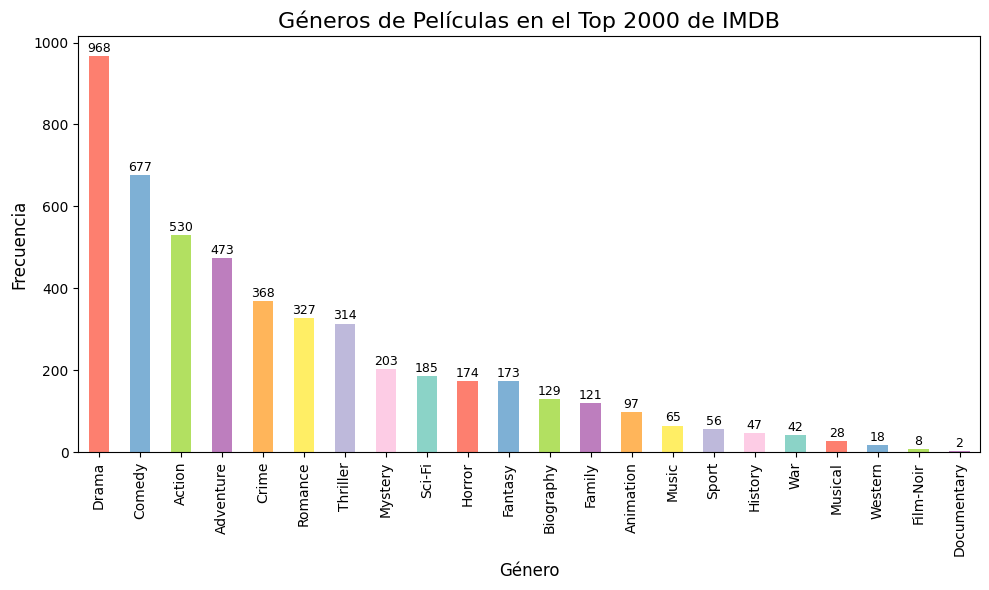

In [421]:
# Obtener la frecuencia de cada género
genero_frecuencia = df['Genre'].str.split(', ', expand=True).stack().value_counts()

# Definir el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Set de colores para diferenciar mejor las proporciones
colores = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

# Crear el gráfico de barras
genero_frecuencia.plot(kind='bar', color=colores)

# Título y etiquetas con diferente tamaño de fuente para mejor lectura
plt.title('Géneros de Películas en el Top 2000 de IMDB', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Anotaciones en las barras
for i, valor in enumerate(genero_frecuencia):
    # Añadir la anotación encima de cada barra
    plt.text(i, valor + 10, str(valor), ha='center', fontsize=9)

# Mostrar gráfico
plt.tight_layout()
plt.show()

### 2. Distribución de películas por época de lanzamiento

Gráfico circular indicando las proporciones de cada época de las películas.

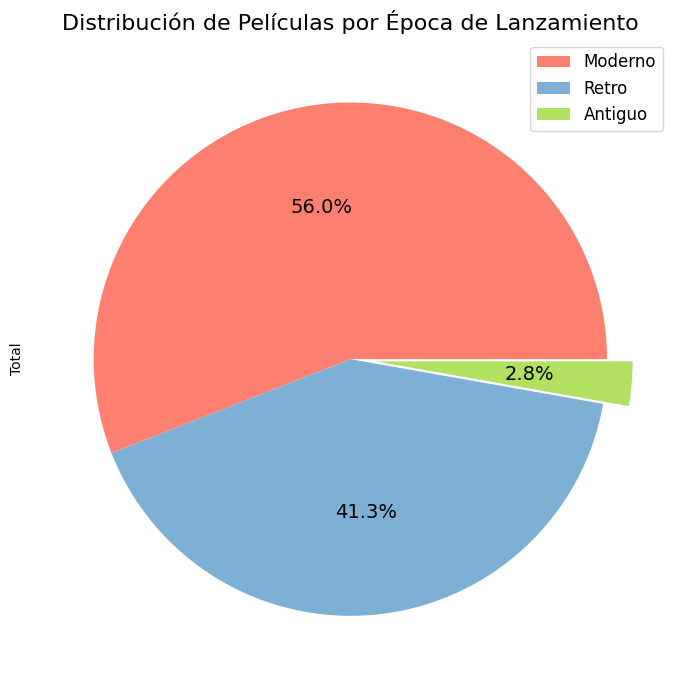

In [422]:
# Agrupar por año de lanzamiento y contar el número de películas en cada año
grupo_por_año = df['Release Year Grouped'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))  # Definir el tamaño del gráfico

# Crear el gráfico de pastel
grupo_por_año.plot(kind='pie', 
                   colors=colores, 
                   autopct='%1.1f%%', 
                   labels=None, 
                   fontsize=14, 
                   explode=(0, 0, 0.1))

# Agregar título
plt.title('Distribución de Películas por Época de Lanzamiento', fontsize=16)
plt.ylabel('Total')

# Añadir leyenda
plt.legend(grupo_por_año.index, loc='best', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()

### 3. Cantidad de Películas por Año de Lanzamiento

Gráfico de líneas que muestra la cantidad de películas en el top 2000 de IMDB por año de lanzamiento

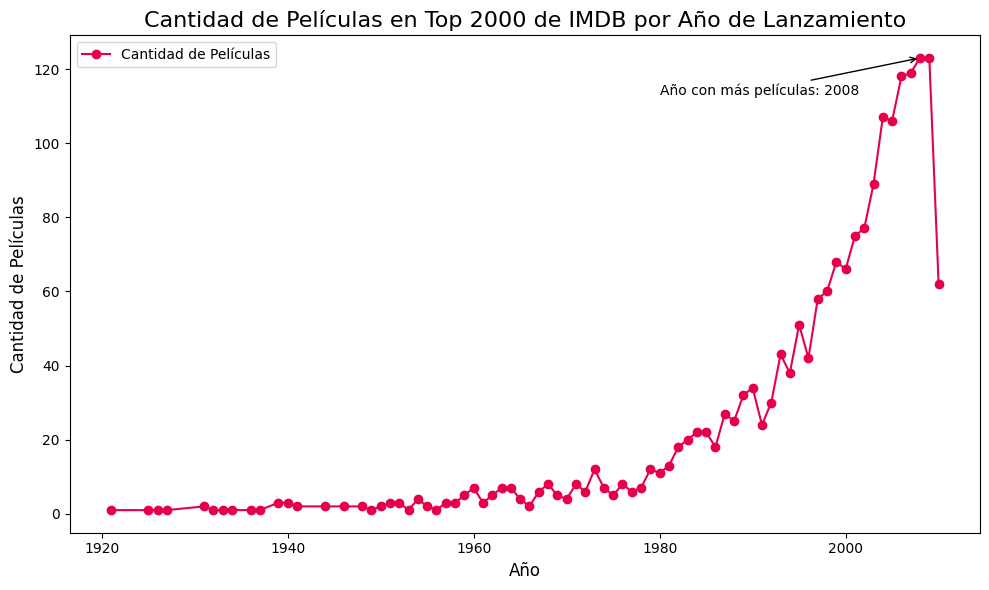

In [423]:
# Agrupar por año de lanzamiento y contar el número de películas en cada año
grupo_por_año = df['Release Year'].value_counts().sort_index()
# Obtener el año con mas películas
año_max = grupo_por_año.idxmax()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Color
color = "#e60049"

# Crear el gráfico de líneas
grupo_por_año.plot(kind='line', color=color, marker='o')

# Agregar título y etiquetas de ejes
plt.title('Cantidad de Películas en Top 2000 de IMDB por Año de Lanzamiento', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Películas', fontsize=12)

# Añadir anotación
plt.annotate('Año con más películas: {}'.format(año_max), 
             xy=(año_max, grupo_por_año.max()),
             xytext=(año_max-28, grupo_por_año.max()-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Añadir leyenda
plt.legend(['Cantidad de Películas'], loc='best', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()


### 4. Recaudacion por año

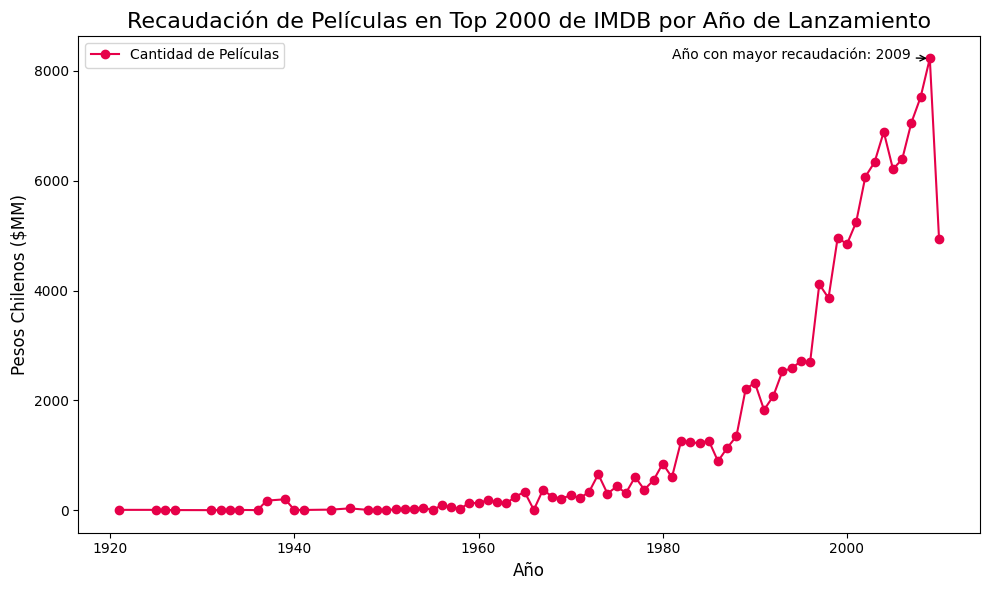

In [425]:
# Agrupar por año de lanzamiento y contar el número de películas en cada año
#grupo_por_año = df['Release Year'].value_counts().sort_index()
grupo_por_año = df.groupby("Release Year")["Gross(CLP$MM)"].sum()


# Obtener el año con mas películas
año_max = grupo_por_año.idxmax()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))

# Color
color = "#e60049"

# Crear el gráfico de líneas
grupo_por_año.plot(kind='line', color=color, marker='o')

# Agregar título y etiquetas de ejes
plt.title('Recaudación de Películas en Top 2000 de IMDB por Año de Lanzamiento', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Pesos Chilenos ($MM)', fontsize=12)

# Añadir anotación
plt.annotate('Año con mayor recaudación: {}'.format(año_max), 
             xy=(año_max, grupo_por_año.max()),
             xytext=(año_max-28, grupo_por_año.max()-10),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Añadir leyenda
plt.legend(['Cantidad de Películas'], loc='best', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()
